**Problem Statement:**
- The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). We have a dataset containing images of
cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image.


**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Data Loading**

In [2]:
# Destination
base_dir = '/content/drive/MyDrive/Colab Notebooks/Cats_Dogs'

**Data Preprocessing and splitting**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalization (Pixel values from [0, 255] → [0, 1])
    validation_split=0.2,         # Split 80% train, 20% validation
    rotation_range=30,            # Randomly rotate images
    width_shift_range=0.2,        # Shift images horizontally
    height_shift_range=0.2,       # Shift images vertically
    shear_range=0.2,              # Shear transformation
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True          # Random horizontal flip
)
print("=========================================")
print("Training Data : ")
# Training data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'             # Use this portion for training
)
print("=========================================")
print("Testing Data : ")
# Validation data generator (only normalization, no augmentation)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'           # Use this portion for validation
)
print("=========================================")

Training Data : 
Found 1600 images belonging to 2 classes.
Testing Data : 
Found 400 images belonging to 2 classes.


**Model Building**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # COnvolutional NN
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),

    # ANN
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes: cat and dog
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,257,858 (16.24 MB)

 Trainable params: 4,257,346 (16.24 MB)

 Non-trainable params: 512 (2.00 KB)

**Compile Model**

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy,
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5403 - loss: 0.7647 - val_accuracy: 0.5350 - val_loss: 0.6915
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.5985 - loss: 0.6746 - val_accuracy: 0.5825 - val_loss: 0.6905
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6195 - loss: 0.6507 - val_accuracy: 0.5450 - val_loss: 0.6872
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6032 - loss: 0.6662 - val_accuracy: 0.6150 - val_loss: 0.6843
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6170 - loss: 0.6520 - val_accuracy: 0.5725 - val_loss: 0.6800
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.6155 - loss: 0.6426 - val_accuracy: 0.6225 - val_loss: 0.6792
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6458 - loss: 0.6183 - val_accuracy: 0.6150 - val_loss: 0.6652
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.6336 - loss: 0.6412 - val_accuracy: 0.6625 - v

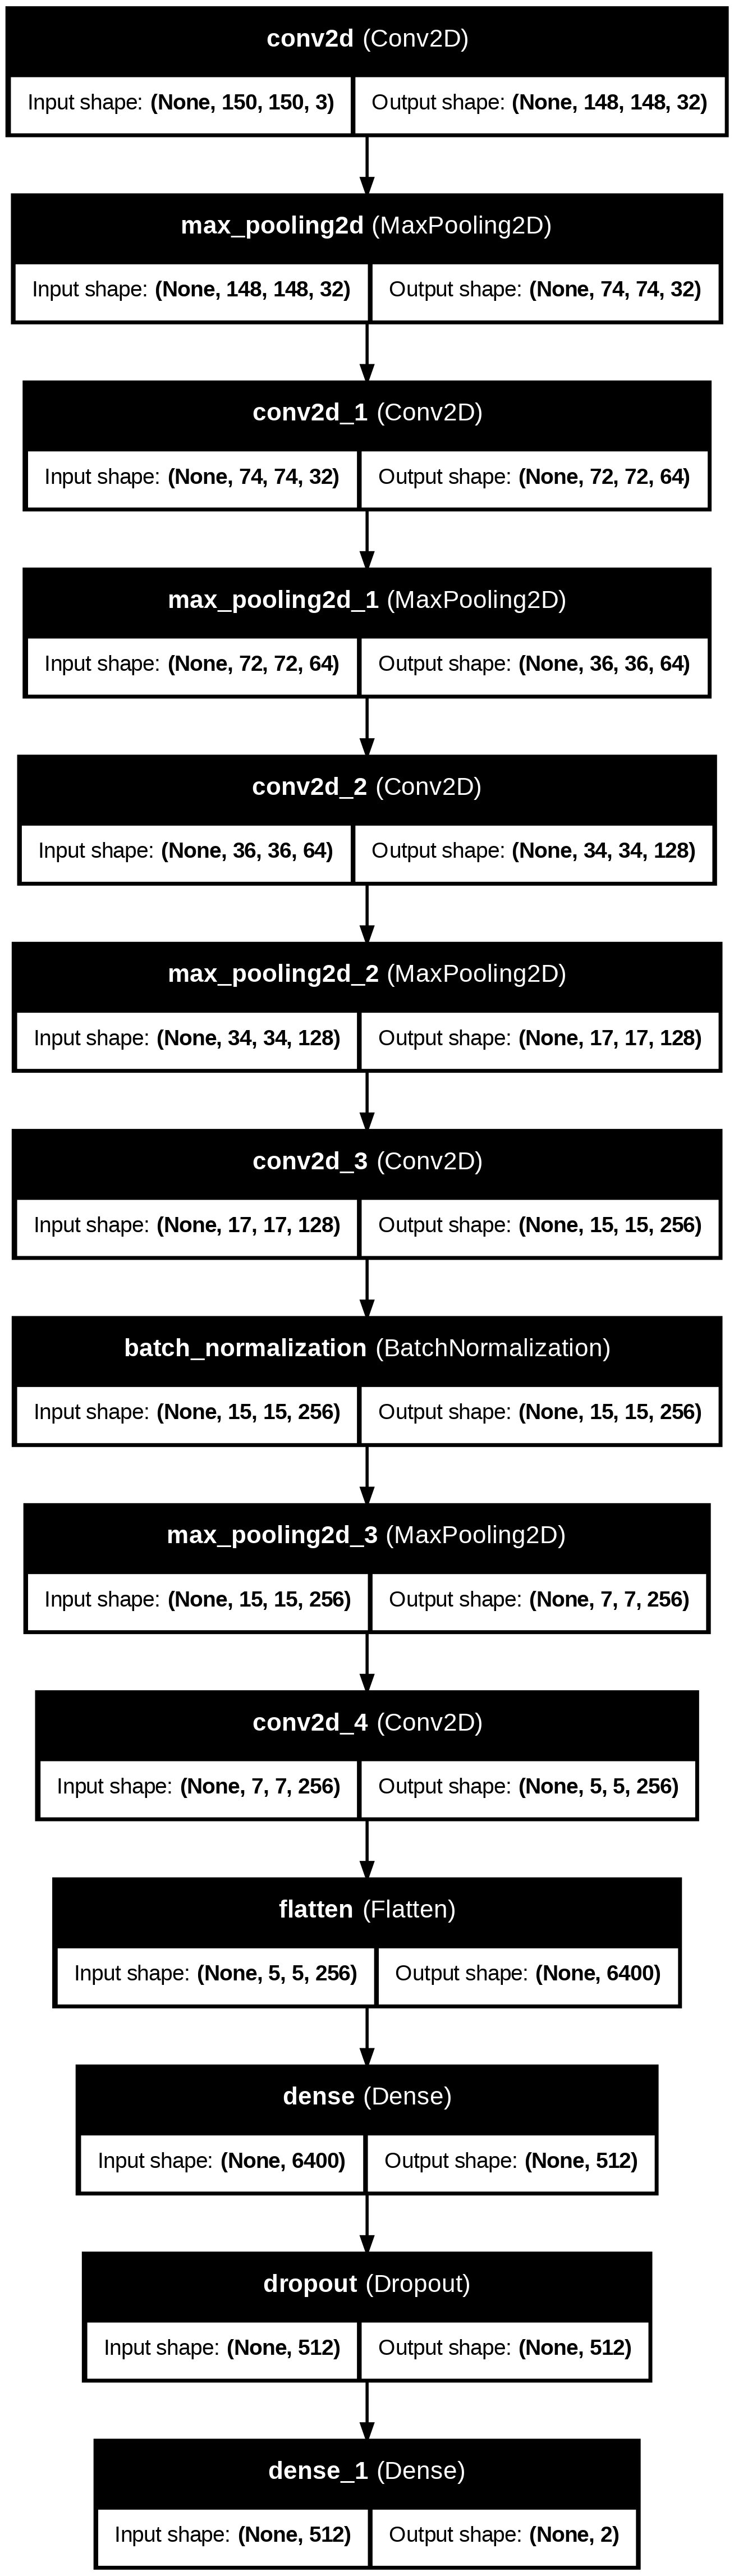

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
    )

**Evaluation**

In [8]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc:.2f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 747ms/step - accuracy: 0.7195 - loss: 0.5503
Validation Accuracy: 0.70


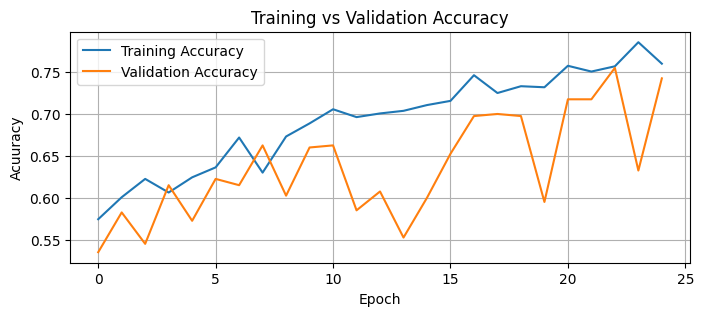

In [9]:
# plot training vs validation Accuracy
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

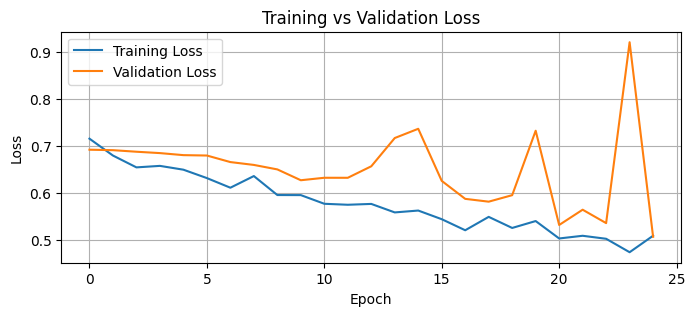

In [10]:
# plot training vs validation loss
plt.figure(figsize=(8,3))
# plt.subplots(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

**Prediction**

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

def predict_image(img_path):
    # Load and preprocess
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


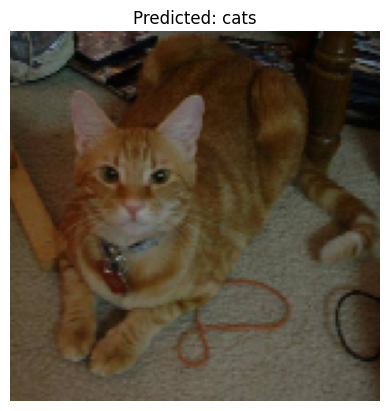

In [13]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.125.jpg')